In [202]:
import pandas as pd
import matplotlib
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [151]:
%matplotlib inline

# configure seaborn to our liking
sns.set_style('darkgrid', {"axes.facecolor": ".95", "axes.edgecolor": "black", "xtick.bottom": "True", \
                           "ytick.left": "True", 'patch.force_edgecolor': False})
sns.set_context("notebook")
sns.set_palette(["#28abe3", "#db3340", "#e8b71a", "#1fda9a", "#f7eac8"])
blend_palette = sns.diverging_palette(258, 12, sep=20, as_cmap=True)

# Description Cell MD 格式备用
<p class="lead">This <a href="https://jupyter.org/">Jupyter notebook</a>
shows how to upload data files to be converted
to [Photon-HDF5](http://photon-hdf5.org) format. </p>

<i>Please send feedback and report any problems to the 
[Photon-HDF5 google group](https://groups.google.com/forum/#!forum/photon-hdf5).</i>

<br>
<div class="alert alert-warning">
<b>NOTE</b> Uploading data files is only necessary when running the notebook online.
</div>

$\color{orange}{我太能摸了，好多description(看图说话)还没写，估计要周二考完来突击了}$

# Data prepocessing

In [117]:
data = pd.read_csv("processed_data.csv").drop(columns=["Unnamed: 0"])
data = data.drop_duplicates(["Appid"])
data = data.dropna()

In [118]:
# Data defore cleaning
data.loc[4468]

Appid                                                         105600
Game name                                                   Terraria
Release date                                            May 16, 2011
Coming soon                                                    False
Initial price                                                   9.99
Final price                                                     9.99
Developer                                                   Re-Logic
Category           Single-player, Multi-player, PvP, Online PvP, ...
Genre                                  Action, Adventure, Indie, RPG
Recommendations                                               457853
Name: 4468, dtype: object

### Date formatting

In [119]:
# Clean date
date = data['Release date'].str.split(',', expand=True)
date["Appid"]=data["Appid"]
date2 = date[0].str.split(' ', expand=True)
date[2] = date2[0]
date[3] = date2[1]
date = date.drop(0, axis=1)
date = date.dropna()
date[1] = date[1].astype('int64')
date[3] = date[3].astype('int64')
date[2] = pd.to_datetime(date[2], format='%b').dt.month
date=date.rename(columns={1:"Year",2:"Month",3:"Day"})
date["Date"] = pd.to_datetime(date[["Year","Month","Day"]])
date=date.drop(["Year","Month","Day"],axis=1).reset_index().drop("index",axis=1)
date = date.set_index("Appid")
data = data.join(df,on="Appid")
data = data.drop(columns = ["Release date"])

In [123]:
print('The shape of the dataset is {}.'.format(data.shape))
data.head(5)

The shape of the dataset is (10136, 10).


,Appid,Game name,Coming soon,Initial price,Final price,Developer,Category,Genre,Recommendations,Date
0,250700,Super Time Force Ultra,False,14.99,14.99,Capybara Games,"Single-player, Steam Achievements, Full contro...","Action, Indie",571,2014-08-25
1,531490,Golden Swords,False,3.99,3.99,Vlad K.,"Single-player, Steam Trading Cards","Adventure, Indie, RPG, Strategy",0,2016-10-26
2,10500,Total War: EMPIRE – Definitive Edition,False,24.99,24.99,"CREATIVE ASSEMBLY, Feral Interactive (Mac), Fe...","Single-player, Multi-player, PvP, Online PvP, ...",Strategy,11335,2009-03-04
3,454930,Under Zero,False,3.99,3.99,Dagestan Technology,"Single-player, Steam Achievements, Steam Tradi...","Action, Adventure, Indie, RPG",746,2017-03-02
4,423900,Dinocide,False,9.99,9.99,AtomicTorch Studio,"Single-player, Full controller support, Steam ...","Action, Adventure, Casual, Indie, RPG",179,2016-01-21


### Column Selection

In [124]:
## Split Genre into columns
Genre_Columns = []
for i in range(1,12):
    Genre_Columns.append("Genre"+str(i))
    
data[Genre_Columns] = data['Genre'].str.split(", ", 10, expand=True)
data["Genre Count"] = data['Genre'].str.count(", ") + 1 

In [238]:
## Split Category into columns (7)
Category_Columns = ["Single-player", "Multi-player", "Co-op", "MMO", "VR Support", "PvP", "Remote Play on Phone"]

for i in Category_Columns:
    data[i] = data["Category"].str.contains(str(i), na=True)
    data[i] = data[i].astype(int)

In [126]:
## Split Developers into columns (2)
data[["Developer Major","Developer 2"]] = data['Developer'].str.split(", ", 1, expand=True)
data["Developer Count"] = data['Developer'].str.count(", ") + 1 

In [127]:
# Data after cleaning
data.loc[4468]

Appid                                                              105600
Game name                                                        Terraria
Coming soon                                                         False
Initial price                                                        9.99
Final price                                                          9.99
Developer                                                        Re-Logic
Category                Single-player, Multi-player, PvP, Online PvP, ...
Genre                                       Action, Adventure, Indie, RPG
Recommendations                                                    457853
Date                                                  2011-05-16 00:00:00
Genre1                                                             Action
Genre2                                                          Adventure
Genre3                                                              Indie
Genre4                                

# Data analysis and visualization

In [128]:
## Data Description
print('The shape of the cleaned dataset is {}.'.format(data.shape))
pd.options.display.float_format = '{:,.2f}'.format
data[["Recommendations","Initial price","Final price","Developer Count","Genre Count"]].describe()

The shape of the cleaned dataset is (10136, 32).


,Recommendations,Initial price,Final price,Developer Count,Genre Count
count,"10,136.00","10,136.00","10,136.00","10,136.00","10,136.00"
mean,"2,584.29",9.79,10.34,1.13,2.79
std,"34,645.15",10.22,10.39,0.43,1.22
min,0.00,0.00,0.00,1.00,1.00
25%,0.00,2.99,2.99,1.00,2.00
50%,147.00,6.99,7.99,1.00,3.00
75%,581.00,14.99,14.99,1.00,3.00
max,"2,850,475.00",199.99,199.99,7.00,11.00


In [129]:
pd.options.display.float_format = '{:,.2f}'.format
data[Category_Columns].describe()

,Single-player,Multi-player,Co-op,MMO,VR Support,PvP,Remote Play on Phone
count,"10,136.00","10,136.00","10,136.00","10,136.00","10,136.00","10,136.00","10,136.00"
mean,0.95,0.27,0.14,0.02,0.01,0.14,0.03
std,0.22,0.44,0.34,0.15,0.10,0.34,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Release Date

In [143]:
print('Our first game was released on {} (min value).'.format(data.Date.min().strftime("%d. %B %Y")))
print('Our last game was released on {} (max value).'.format(data.Date.max().strftime("%d. %B %Y")))
print('{} games are planning to release in the future.'.format(len(data[data["Coming soon"] == True])))

Our first game was released on 30. June 1997 (min value).
Our last game was released on 01. January 2021 (max value).
32 games are planning to release in the future.


<i>Although there are games released between 1 Jan 2021 and the current date, the release date recorded in the data set is ambiguous(eg. 2021 Fall). In this case we only count games with exact release dates</i>

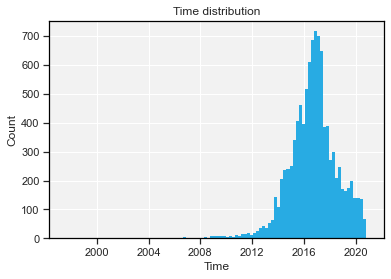

In [153]:
plt.hist(data['Date'], bins=100)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Time distribution')

plt.show()

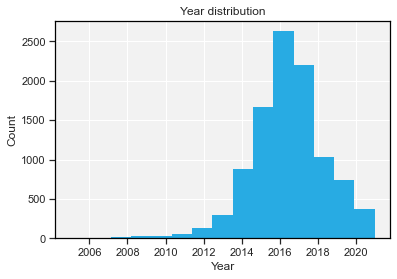

In [158]:
years = data['Date'].map(lambda t: t.year)

plt.hist(years, bins=15, range=(2005,2021))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year distribution')

plt.show()

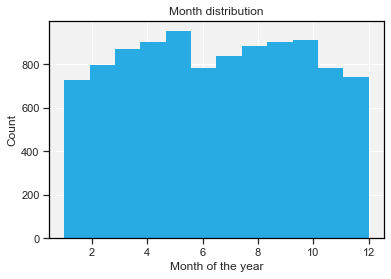

In [159]:
months = data['Date'].map(lambda t: t.month)

plt.hist(months, bins=12)
plt.xlabel('Month of the year')
plt.ylabel('Count')
plt.title('Month distribution')

plt.show()

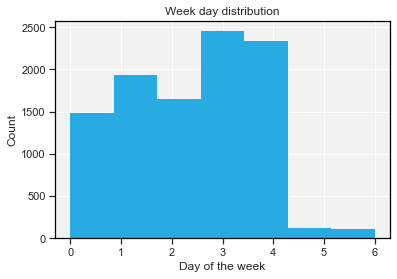

In [160]:
# 0: Monday, 6: Sunday
week_days = data['Date'].map(lambda t: t.weekday())

plt.hist(week_days, bins=7)
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Week day distribution')

plt.show()

### Genre

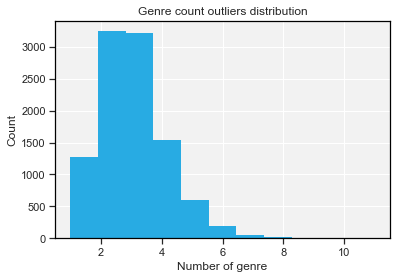

In [185]:
plt.hist(data["Genre Count"],bins=11)
plt.xlabel('Number of genre')
plt.ylabel('Count')
plt.title('Genre count outliers distribution')
plt.show()

$\color{orange}{有空还想弄一个根据genre加总recommendation总数的chart，这样的话data还要动(还是要把所有genre都拆出来比较好)，不知道有没有简单一点的写法。}$

In [224]:
for i in Unique_genre:
    data[i] = np.where(data["Genre"].str.contains(str(i), na=True),1,0)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data.loc[4468])

$\color{orange}{⬆拆了，还没想好怎么写sum}$

In [249]:
## Genre Statistics
append_genre = pd.Series(dtype=str)
for i in Genre_Columns:
    append_genre = append_genre.append(data[i])
Unique_genre = append_genre.unique()
Genre_stat = pd.DataFrame(append_genre.value_counts(),columns=["Count"])
Genre_stat["%"] = round(Genre_stat["Count"]/sum(Genre_stat["Count"])*100,2)
Genre_stat

,Count,%
Indie,7496,26.52
Action,4791,16.95
Adventure,4274,15.12
Casual,3379,11.95
Strategy,2147,7.59
RPG,2055,7.27
Simulation,1710,6.05
Early Access,498,1.76
Free to Play,475,1.68
Sports,348,1.23


### Developer

As we would probably expect, the mean is 1.13 with a standard deviation of 0.43.


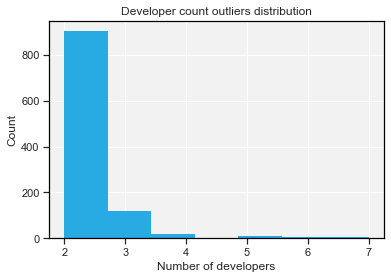

In [169]:
print('As we would probably expect, the mean is {:0.2f} with a standard deviation of {:0.2f}.'\
      .format(data["Developer Count"].mean(),data["Developer Count"].std()))

plt.hist(data[data["Developer Count"] > 1]["Developer Count"],bins=7)
plt.xlabel('Number of developers')
plt.ylabel('Count')
plt.title('Developer count outliers distribution')
plt.show()

$\color{orange}{同上有空还想弄一个根据developer加总recommendation总数的chart，没想好怎么弄，弄不出就算了}$

In [130]:
## Developer Statistics
append_developer = data["Developer Major"].append(data["Developer 2"])
Unique_developer = append_developer.unique()
Developer_stat = pd.DataFrame(append_developer.value_counts(),columns=["Count"])
Developer_stat = Developer_stat.drop(labels=["Inc.","LLC","Ltd.","LTD.","Feral Interactive (Linux)"])
Developer_stat["%"] = round(Developer_stat["Count"]/sum(Developer_stat["Count"])*100,2)
Developer_stat.head(20)

,Count,%
Square Enix,33,0.30
EnsenaSoft,32,0.29
Alawar Entertainment,29,0.26
Warfare Studios,29,0.26
Winged Cloud,27,0.25
Winter Wolves,23,0.21
Idea Factory,23,0.21
NedoStudio,21,0.19
Quiet River,21,0.19
Creobit,21,0.19


### Price

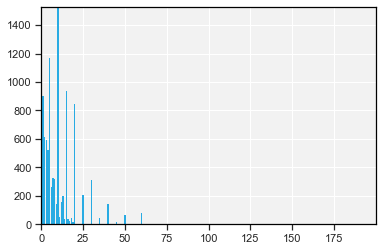

,Price,Count
0,9.99,1528
1,4.99,1166
2,14.99,936
3,0.99,900
4,19.99,844
...,...,...
57,19.69,1
58,1.20,1
59,59.95,1
60,89.99,1


In [174]:
## Price Distribution
Price_stat = pd.DataFrame(data["Final price"].astype(float).value_counts()).reset_index().rename(columns={"index":"Price","Final price":"Count"})

plt.xlim(0, Price_stat.Price.max())
plt.ylim(0, Price_stat.Count.max())
plt.bar("Price", "Count", data=Price_stat)
plt.show()

Price_stat

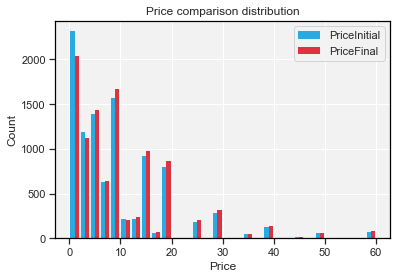

In [178]:
plt.hist([data["Initial price"], data["Final price"]], bins=30, range=(0,60), label=['PriceInitial', 'PriceFinal'])
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price comparison distribution')
plt.show()

### Recommendation

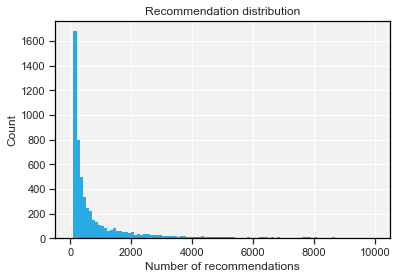

In [192]:
plt.hist(data[data["Recommendations"]>0]["Recommendations"],bins=100,range=(1,10000))
plt.xlabel('Number of recommendations')
plt.ylabel('Count')
plt.title('Recommendation distribution')
plt.show()

In [171]:
## Most Recommended
Recommend_stat = data[["Appid","Game name","Recommendations", "Date", "Final price","Genre"]].sort_values(by=["Recommendations"],ascending=False)
Recommend_stat.head(20)

,Appid,Game name,Recommendations,Date,Final price,Genre
3456,730,Counter-Strike: Global Offensive,2850475,2012-08-21,14.99,"Action, Free to Play"
2214,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,1295198,2017-12-21,29.99,"Action, Adventure, Massively Multiplayer"
117,359550,Tom Clancy's Rainbow Six® Siege,622678,2015-12-01,19.99,Action
1060,4000,Garry's Mod,503430,2006-11-29,9.99,"Indie, Simulation"
4468,105600,Terraria,457853,2011-05-16,9.99,"Action, Adventure, Indie, RPG"
3234,292030,The Witcher® 3: Wild Hunt,376029,2015-05-18,39.99,RPG
7487,252490,Rust,367337,2018-02-08,39.99,"Action, Adventure, Indie, Massively Multiplaye..."
50,252950,Rocket League®,333485,2015-07-07,19.99,"Action, Indie, Racing, Sports"
9406,346110,ARK: Survival Evolved,284600,2017-08-27,49.99,"Action, Adventure, Indie, Massively Multiplaye..."
42,218620,PAYDAY 2,279911,2013-08-13,9.99,"Action, RPG"


In [71]:
## Characteristic of the recommended (100)
Recommend = data.sort_values(by=["Recommendations"],ascending=False).head(100).drop(columns=["Category","Genre","Developer"])

## Data Description of recommended games(top 100)
pd.options.display.float_format = '{:,.2f}'.format
Recommend[["Recommendations","Initial price","Final price","Developer Count","Genre Count"]].describe()

,Recommendations,Initial price,Final price,Developer Count,Genre Count
count,100.00,100.00,100.00,100.00,100.00
mean,"150,839.08",25.64,26.64,1.49,2.32
std,"314,897.10",16.21,15.44,1.13,1.22
min,"41,423.00",0.00,0.00,1.00,1.00
25%,"50,127.50",14.99,14.99,1.00,1.00
50%,"69,075.00",19.99,19.99,1.00,2.00
75%,"128,463.75",29.99,29.99,1.00,3.00
max,"2,850,475.00",59.99,59.99,7.00,7.00


Compared to the whole dataset, the top 100 most recommended games have an overall higher price($26 vs $10), more developers(1.5 vs 1.1) and more focued genres(2.3 vs 2.9). Also, people are more likely to prefer games with Multi-player, Co-op and PvP modes compared to those merely single-player games. The features of remote play on phone is also preferred.

In [72]:
pd.options.display.float_format = '{:,.2f}'.format
Recommend[Category_Columns].describe()

,Single-player,Multi-player,Co-op,MMO,VR Support,PvP,Remote Play on Phone
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,0.86,0.61,0.42,0.04,0.01,0.28,0.39
std,0.35,0.49,0.50,0.20,0.10,0.45,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [199]:
append_genre_R = pd.Series(dtype=str)
for i in Genre_Columns:
    append_genre_R = append_genre_R.append(Recommend[i])
Unique_genre_R = append_genre_R.unique()
Genre_stat_R = pd.DataFrame(append_genre_R.value_counts(),columns=["Count"])
Genre_stat_R["%"] = round(Genre_stat_R["Count"]/sum(Genre_stat_R["Count"])*100,2)
Genre_stat_R.head(10)

,Count,%
Action,65,28.02
Indie,42,18.10
Adventure,39,16.81
RPG,26,11.21
Simulation,21,9.05
Strategy,19,8.19
Massively Multiplayer,6,2.59
Casual,5,2.16
Free to Play,2,0.86
Racing,1,0.43


In [250]:
Unique_genre = list(Unique_genre)
Unique_genre = list(filter(bool, Unique_genre))
numerical_columns = ["Recommendations","Genre Count","Developer Count"] + Unique_genre + Category_Columns
cm = sns.light_palette("green", as_cmap=True)
corr = data[numerical_columns].corr()
corr.style.background_gradient(cmap=cm)